## EAD

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sea 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('dataset\\state.csv')
data.head(3)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ


In [3]:
data['Population'].median()

np.float64(4436369.5)

In [4]:
data['Population'].quantile(.75) - data['Population'].quantile(.25)

np.float64(4847308.0)

In [5]:
from statsmodels.robust import scale 

scale.mad(data['Population'])

np.float64(3849876.1459979336)

Variabilidade

In [6]:
data['Population'].quantile([.05, .25, 0.5, .75, .95])

0.05      689529.00
0.25     1833004.25
0.50     4436369.50
0.75     6680312.25
0.95    19118545.60
Name: Population, dtype: float64

In [7]:
pd.cut(data['Population'], 10).value_counts()/data.shape[0]

Population
(526935.67, 4232659.0]      0.48
(4232659.0, 7901692.0]      0.28
(7901692.0, 11570725.0]     0.12
(11570725.0, 15239758.0]    0.04
(15239758.0, 18908791.0]    0.02
(18908791.0, 22577824.0]    0.02
(22577824.0, 26246857.0]    0.02
(33584923.0, 37253956.0]    0.02
(26246857.0, 29915890.0]    0.00
(29915890.0, 33584923.0]    0.00
Name: count, dtype: float64

<Axes: ylabel='Frequency'>

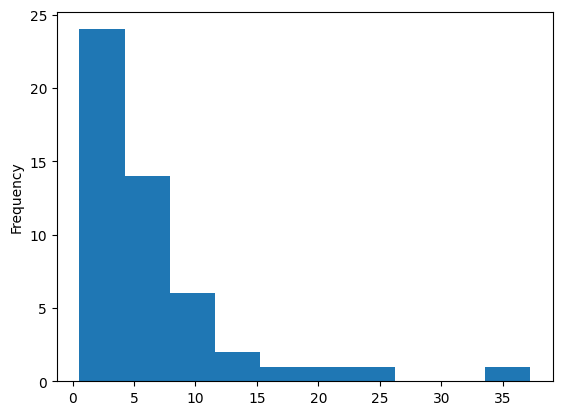

In [8]:
(data['Population']/1e+6).plot.hist()

In [9]:
kc_tax = pd.read_csv('dataset\\kc_tax.csv')

In [10]:
kc_tax0 = kc_tax[
    (kc_tax.TaxAssessedValue < 750_000) &
    (kc_tax.SqFtTotLiving >100)&
    (kc_tax.SqFtTotLiving < 3_500)
]

<Axes: xlabel='TaxAssessedValue', ylabel='SqFtTotLiving'>

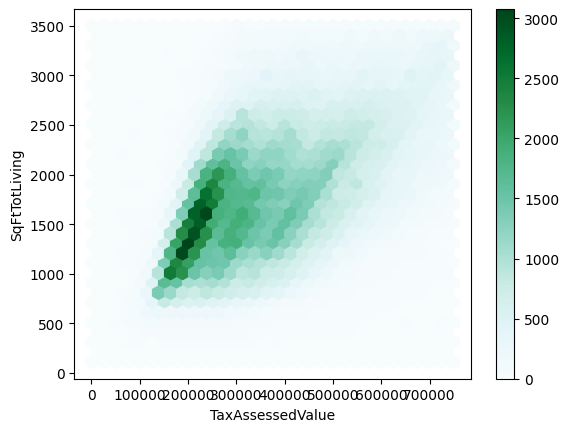

In [11]:
kc_tax0.plot.hexbin(x='TaxAssessedValue', y='SqFtTotLiving', gridsize=30)

In [18]:
subset = kc_tax0.sample(frac=0.2)

<Axes: xlabel='TaxAssessedValue', ylabel='SqFtTotLiving'>

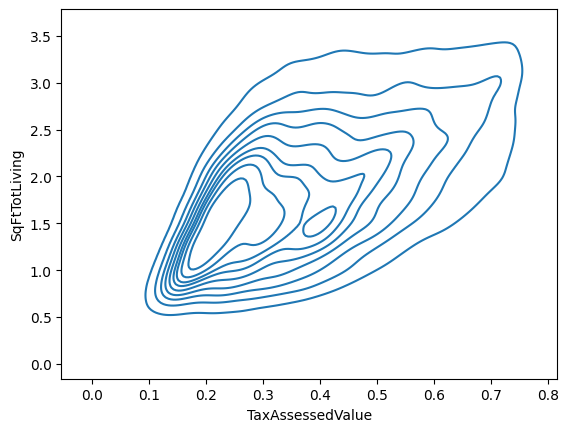

In [19]:
sea.kdeplot(
    x=subset['TaxAssessedValue']/1e+6,
    y=subset['SqFtTotLiving']/1e+3,
)

<Axes: ylabel='SqFtTotLiving'>

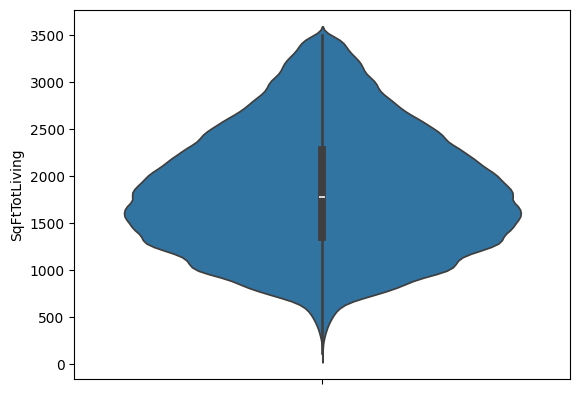

In [21]:
sea.violinplot(y=kc_tax0['SqFtTotLiving'])

<Axes: ylabel='TaxAssessedValue'>

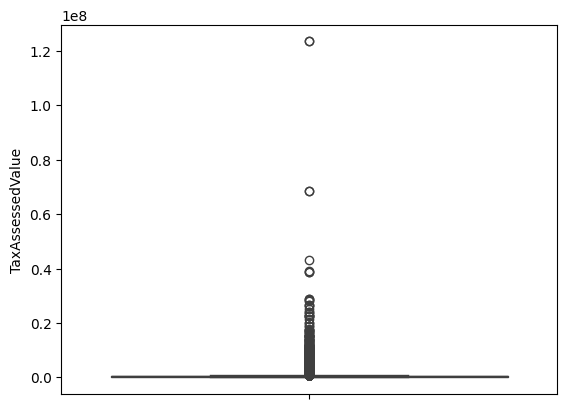

In [24]:
sea.boxplot(y=kc_tax['TaxAssessedValue'])